<a id='top'></a>

<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
url = 'https://raw.githubusercontent.com/hodsfiles/HrDataProject/main/googleplaystore.csv'
apps = pd.read_csv(url)
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [44]:
apps.shape

(10841, 14)

In [45]:
apps[['Content Rating']].value_counts()

Content Rating 
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<a id='section1'></a>
### 1. Handling Data
[back to top](#top)


In [46]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [47]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='section1.2'></a>
#### 1.2 checking values
[back to top](#top)

In [48]:
apps.shape

(10841, 13)

In [49]:
apps.duplicated().sum()

483

In [50]:
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [51]:
apps.duplicated().sum()

0

In [52]:
apps.shape

(10350, 13)

In [53]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [54]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [55]:
apps.replace('Varies with device', np.nan, inplace=True)

In [56]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [57]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

# Display the first few rows to verify the changes
print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [58]:
apps['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', '1.20 ', '1.04 '], dtype=object)

In [59]:
apps = apps.drop('Size', axis=1)

In [60]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [20]:

# ניקוי המילים "and up" מהעמודה "Android Ver"
#apps['Android Ver'] = apps['Android Ver'].str.replace('and up', '', regex=False)


In [21]:
apps.shape

(10338, 13)

In [22]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [61]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [62]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


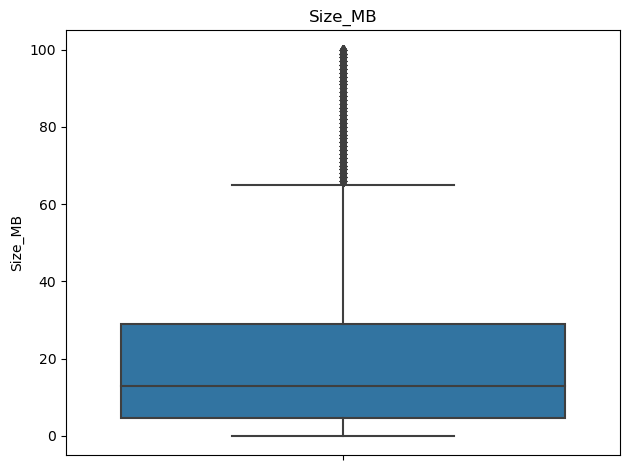

In [63]:

# Creating boxplots for each column and displaying them in the same row
plt.subplot()
sns.boxplot(data=apps, y='Size_MB')
plt.title('Size_MB')

plt.tight_layout()
plt.show()

בדיקת חריגות בעמודות הרצויות

עמודת גודל האפליקציה = הערכים חריגים קיימים, מה שמצביע על הפרשים גדולים בגודל האפליקציות בין הנתונים, הערכים החריגים משפיעים על התפלגות הנתונים.
לכן נמלא את הערכים החסרים בחציון.

In [64]:
median_size_mb = apps['Size_MB'].median()

# מילוי הערכים החסרים בעמודת Size_MB בחציון
apps['Size_MB'] = apps['Size_MB'].fillna(median_size_mb)

# הצגת התוצאה כדי לוודא שהערכים החסרים מולאו
print(apps['Size_MB'].isna().sum()) 

0


In [65]:
missing_data = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data)

Missing data after handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB              0
dtype: int64


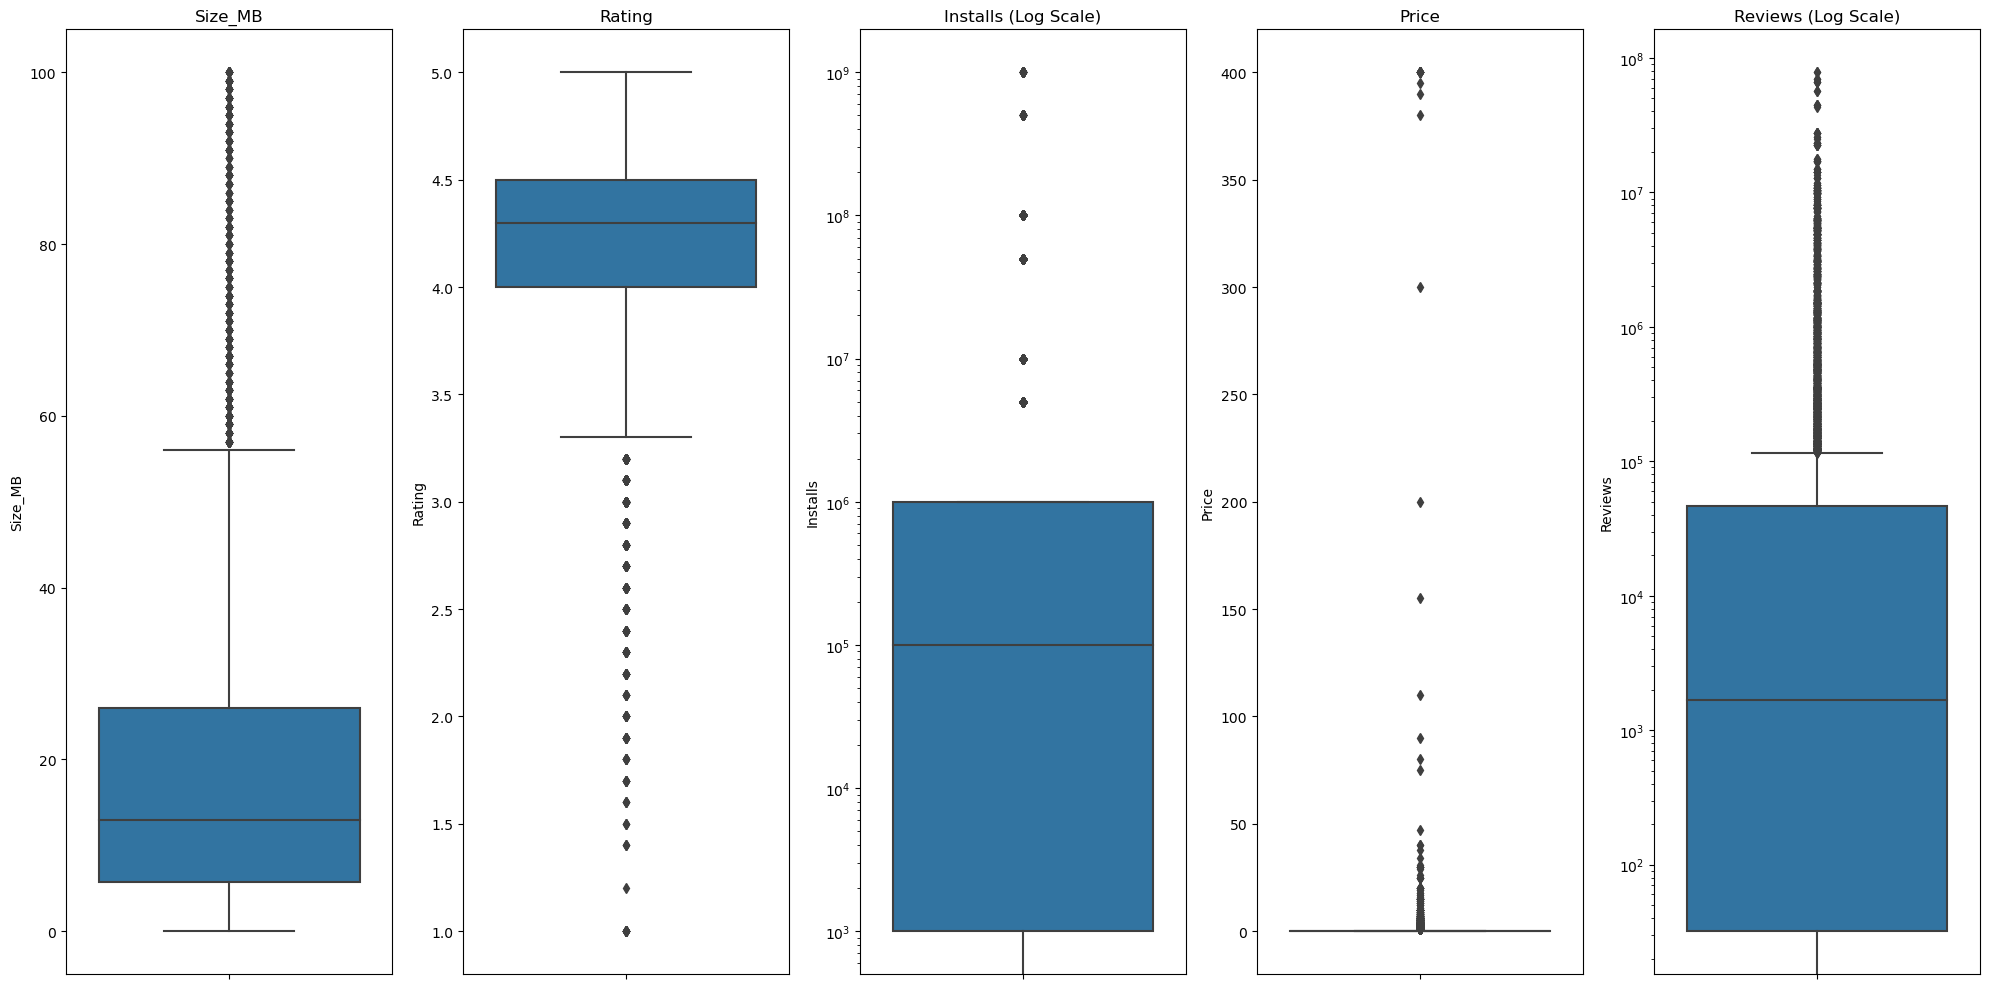

In [28]:
plt.figure(figsize=(20, 10))

# יצירת גרפי Box plot לכל עמודה והצגתן באותה השורה
plt.subplot(1, 5, 1)
sns.boxplot(data=apps, y='Size_MB')
plt.title('Size_MB')

plt.subplot(1, 5, 2)
sns.boxplot(data=apps, y='Rating')
plt.title('Rating')

plt.subplot(1, 5, 3)
sns.boxplot(data=apps, y='Installs')
plt.yscale('log')
plt.title('Installs (Log Scale)')

plt.subplot(1, 5, 4)
sns.boxplot(data=apps, y='Price')
plt.title('Price')

plt.subplot(1, 5, 5)
sns.boxplot(data=apps, y='Reviews')
plt.yscale('log')
plt.title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

מסקנה 1 - בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

מסקנה 2 - 
מציאת הקשר בין דירוג האפליקציות לבין סיווג האפליקציות לפי סוגי האוכלוסיות השונות

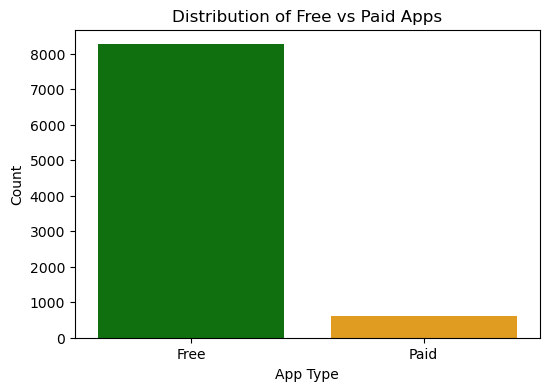

In [29]:
data_cleaned = apps.dropna(subset=['Type', 'Rating'])

# הגדרת צבעים מותאמים אישית
palette = {'Free': 'green', 'Paid': 'orange'}

# יצירת גרף עמודות המציג את התפלגות האפליקציות החינמיות מול האפליקציות בתשלום
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=data_cleaned, palette=palette)
plt.title('Distribution of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()

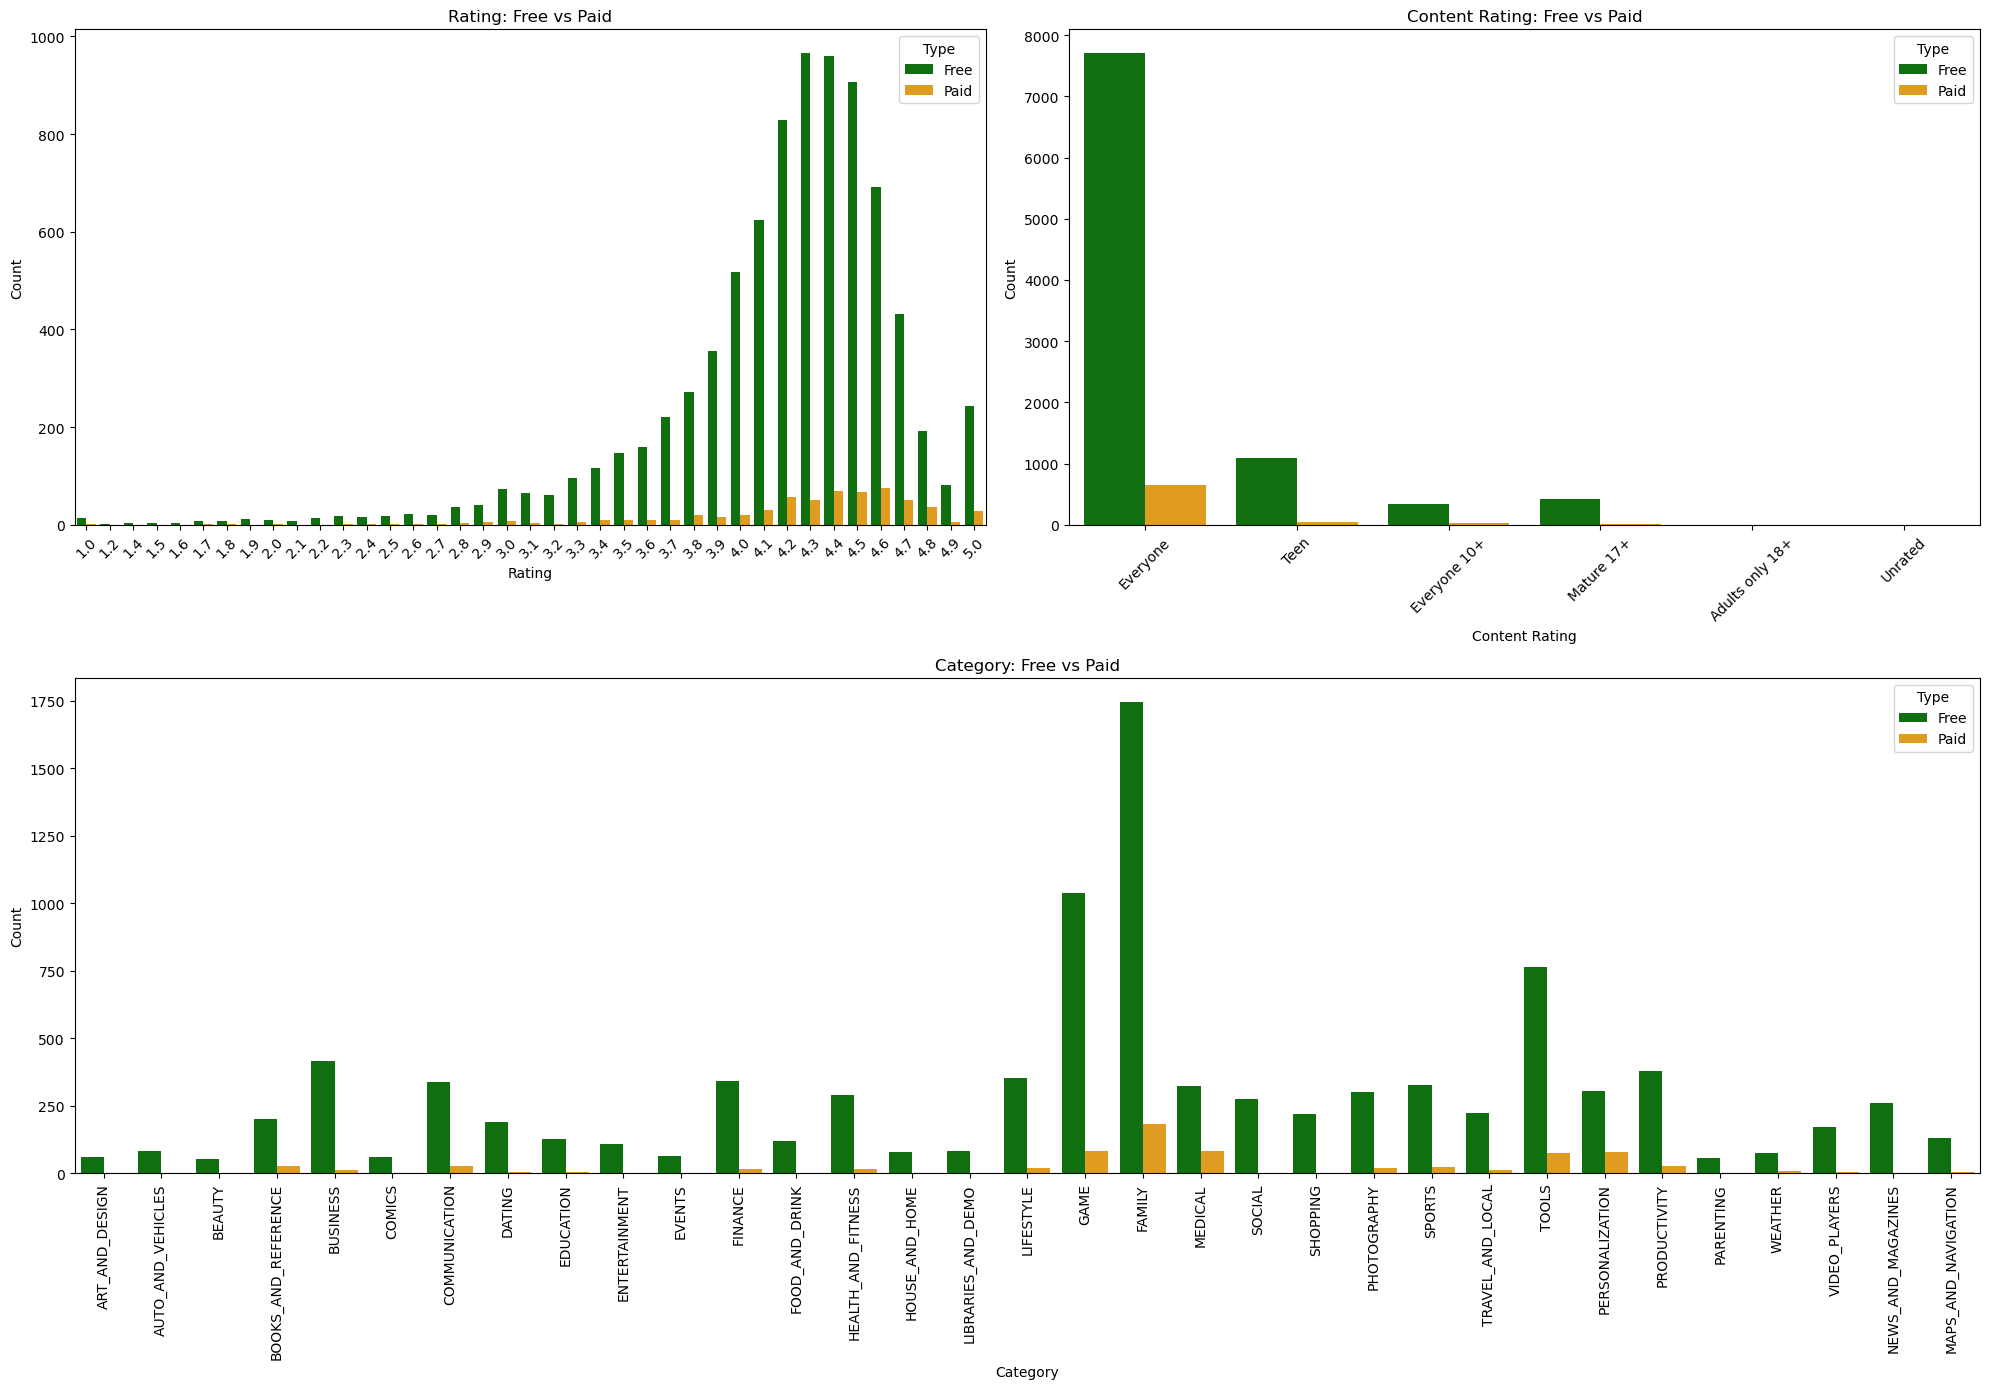

In [30]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

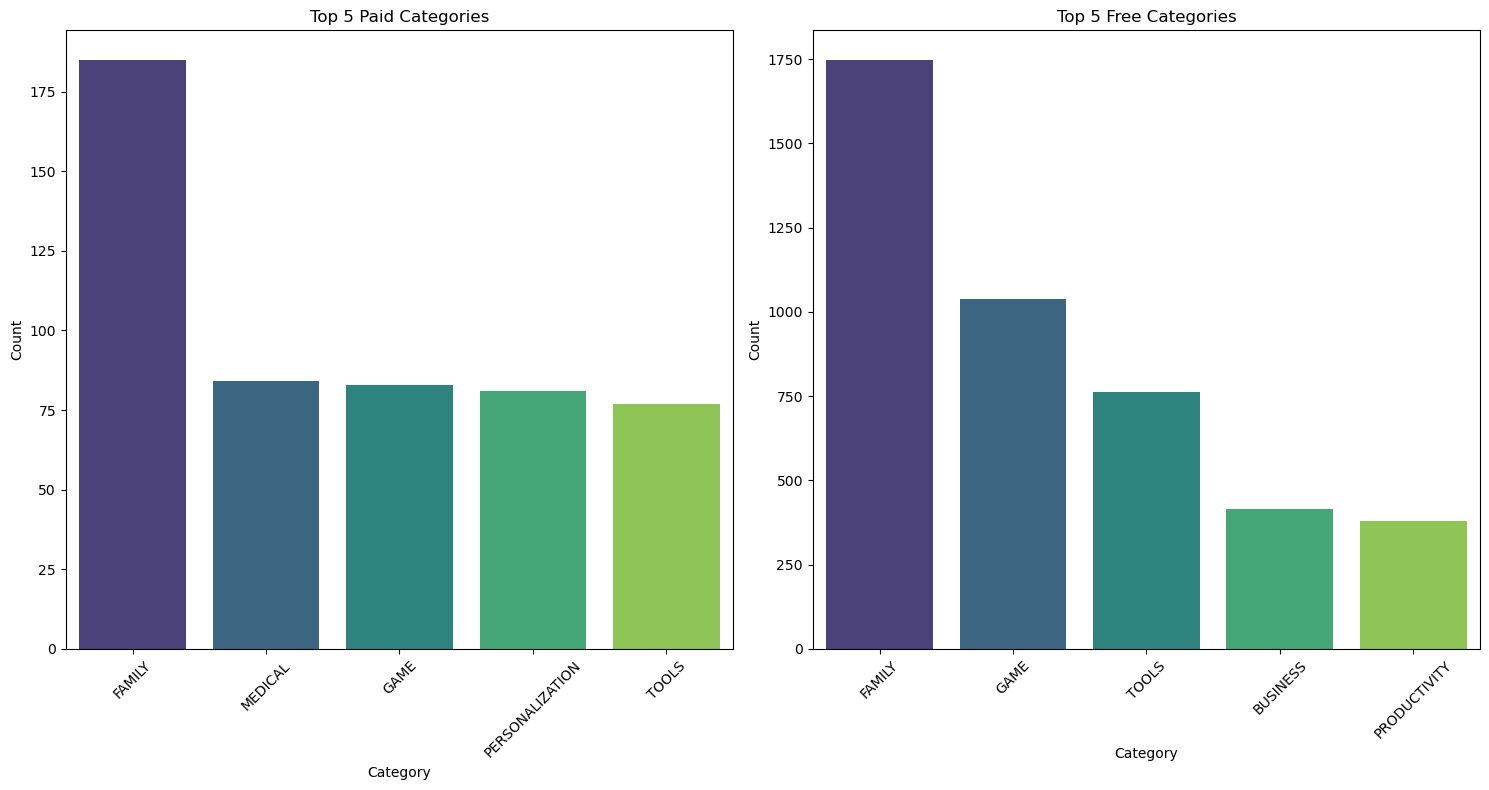

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# סינון הנתונים עבור האפליקציות שבתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון הנתונים עבור האפליקציות שבחינם
free_apps = apps[apps['Type'] == 'Free']

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(15, 8))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


In [32]:
# חישוב הדירוג הממוצע לאפליקציות בתשלום
average_rating_paid = data_cleaned[data_cleaned['Type'] == 'Paid']['Rating'].mean()

# חישוב הדירוג הממוצע לאפליקציות חינמיות
average_rating_free = data_cleaned[data_cleaned['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.26
The average rating of free apps is: 4.18


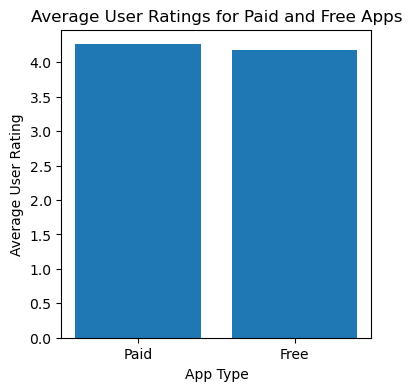

In [75]:
plt.figure(figsize=(4, 4))
categories = ["Paid", "Free"]
free_avg_user_rating = apps[apps["Type"] == "Free"].Rating.mean()
paid_avg_user_rating = apps[apps["Type"] == "Paid"].Rating.mean()
avg_ratings = [paid_avg_user_rating, free_avg_user_rating]
plt.bar(categories, avg_ratings)
plt.xlabel('App Type')
plt.ylabel('Average User Rating')
plt.title('Average User Ratings for Paid and Free Apps')
plt.show()

ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן נמוך יותר אפליקציות בתשלום.

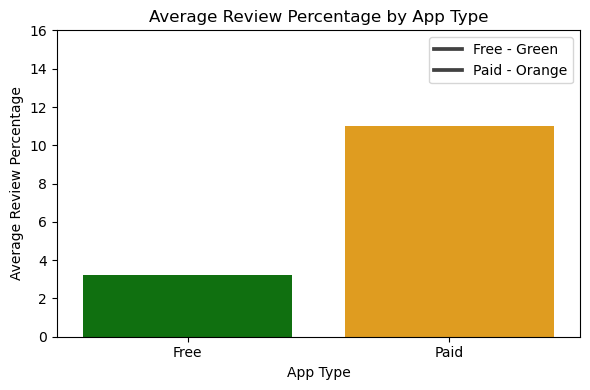

In [84]:
# חישוב אחוז הביקורות מסך כל ההתקנות לכל אפליקציה
apps['Review_Percentage'] = (apps['Reviews'] / apps['Installs']) * 100

# הסרת ערכים לא חוקיים בעמודת 'Review_Percentage'
apps = apps.dropna(subset=['Review_Percentage'])
apps = apps[apps['Review_Percentage'].apply(lambda x: isinstance(x, (int, float)))]


# יצירת גרף עמודות עם צבעים מותאמים ומקרא
plt.figure(figsize=(6, 4))
sns.barplot(data=average_review_percentage_df, x='Type', y='Average Review Percentage', palette=['green', 'orange'])
plt.title('Average Review Percentage by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Review Percentage')
plt.ylim(0, max(average_review_percentage_df['Average Review Percentage']) + 5)

# הוספת מקרא
plt.legend(['Free - Green', 'Paid - Orange'], loc='upper right')

plt.tight_layout()
plt.show()


### תובנה 1:

הנחת היסוד הייתה שמשתמשים שרכשו אפליקציות בתשלום יהיו ביקורתיים יותר ויטו לדרג אותן בציונים נמוכים יותר, מכיוון שהם משקיעים משאבים כספיים ולכן יצפו לחוויה משתמש משופרת. 

ניתוח הנתונים אכן הראה כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

לעומת זאת, בניגוד להנחה המקורית, התוצאות הצביעו על כך שהדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות.

לסיכום, קיימת פעילות ביקורתית רבה יותר מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק דירוגים גבוהים יותר לאפליקציות אלה. לכן, ניתן להסיק מכך שההשקעה הכספית באפליקציות משפיעה על חוויית המשתמש ורמת שביעות הרצון מהמוצר.

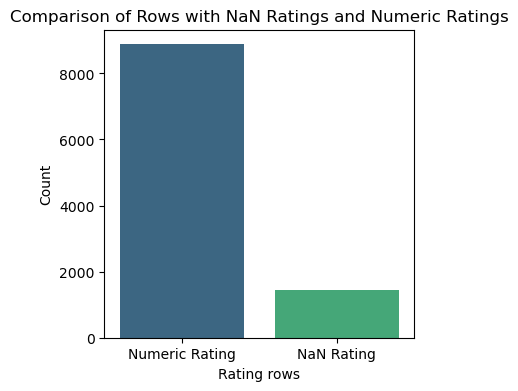

In [76]:
apps['Rating_NaN'] = apps['Rating'].isna()

# Count the number of NaN and non-NaN ratings
rating_counts = apps['Rating_NaN'].value_counts()

# Create the count plot
plt.figure(figsize=(4, 4))
sns.countplot(x='Rating_NaN', data=apps, palette='viridis')
plt.title('Comparison of Rows with NaN Ratings and Numeric Ratings')
plt.xlabel('Rating rows')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Numeric Rating', 'NaN Rating'])
plt.show()

In [ ]:
content_rating_comparison = apps.pivot_table(index='Content Rating', columns='Rating_NaN', aggfunc='size', fill_value=0)

# המרת הטבלה לפורמט ארוך לצורך יצירת הגרף
content_rating_comparison_long = content_rating_comparison.reset_index().melt(id_vars='Content Rating', var_name='Rating_NaN', value_name='Count')

# יצירת גרף השוואה
plt.figure(figsize=(8, 5))
sns.barplot(x='Content Rating', y='Count', hue='Rating_NaN', data=content_rating_comparison_long, palette='viridis')
plt.title('Comparison of Content Rating with NaN and Numeric Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating NaN', labels=['Numeric Rating', 'NaN Rating'])
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.histplot(apps['Size_MB'], ax=axes[0], bins=25)
sns.histplot(apps['Size_MB'], log_scale=True, ax=axes[1], bins=25)

axes[0].set_title('Distribution of App Sizes (MB)')
axes[1].set_title('Log-Scale Distribution of App Sizes (MB)')
plt.show()

In [ ]:
plt.figure(figsize=(2,4))
sns.boxplot(data = apps, y= 'Size')

In [ ]:
top_10_installs = apps.sort_values(by='Installs', ascending=False).head(10)

#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Installs'], inplace=True)
# הצגת האפליקציות עם הכי הרבה התקנות
print(top_10_installs[[ 'App','Installs']])

In [ ]:
apps_list = ["Google Play Books", "Subway Surfers", "Facebook", "Google Photos", 
    "Instagram", "Maps - Navigate & Explore", "Hangouts", 
    "Gmail", "Google Chrome: Fast & Secure", "WhatsApp Messenger"]

# סינון הנתונים עבור האפליקציות שצוינו
filtered_data = apps[apps['App'].isin(apps_list)]

# מציאת 2 האפליקציות עם הכי הרבה התקנות
top_2_apps = filtered_data['App'].value_counts().index[:]

# יצירת גרף בר עם seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='App', y='Installs',log_scale = True, order=top_2_apps)
plt.title('Top 2 Most Installed Apps')
plt.xlabel('App')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#apps["Size_MB"] = apps["Size_MB"].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Separate numeric and non-numeric columns
"""
numeric_cols = apps.select_dtypes(include=[np.number]).columns
non_numeric_cols = apps.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the median
apps[numeric_cols] = apps[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing values for non-numeric columns with the mode
apps[non_numeric_cols] = apps[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
missing_data_after = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data_after)"""

In [ ]:
#apps['Type'] = apps['Type'].map({'Free': 0, 'Paid': 1})

In [ ]:
apps.hist(bins=30, figsize=(15,10), color='b')

In [ ]:

apps.head()

In [ ]:
#plt.figure(figsize=(14, 12))
#correlation_matrix = apps.corr(numeric_only=True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
#plt.title('Correlation Heatmap of Google Play Store Data')
#plt.show()

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

In [ ]:
apps.columns

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_options = len(apps["Content Rating"].unique())
print('Number of options = ', num_options)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_Content_Rating = apps["Content Rating"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_Content_Rating.index, # index = category name
        y = num_apps_in_Content_Rating.values, # value = count
)]

plotly.offline.iplot(data)

In [ ]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

In [ ]:
fig, ax =plt.subplots(ncols=3, figsize=(20, 7))
sns.countplot(data=apps,x='Rating',hue='Type',ax=ax[0],palette='colorblind')
sns.countplot(data=apps,x='Content Rating',hue='Type',ax=ax[1])
sns.countplot(data=apps,x='Category',hue='Type',ax=ax[2])
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_cleaned = apps.dropna(subset=['Rating', 'Type'])
data_cleaned.head()

In [ ]:
# חישוב הדירוג הממוצע לאפליקציות בתשלום
average_rating_paid = data_cleaned[data_cleaned['Type'] == 'Paid']['Rating'].mean()

# חישוב הדירוג הממוצע לאפליקציות חינמיות
average_rating_free = data_cleaned[data_cleaned['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {average_rating_paid}')
print(f'The average rating of free apps is: {average_rating_free}')


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# גרף עמודות המציג את דירוג האפליקציות הממוצע לפי סוג האפליקציה
sns.barplot(x='Type', y='Rating', data=data_cleaned, ax=axes[0])
axes[0].set_title('Average Rating by App Type')
axes[0].set_xlabel('App Type')
axes[0].set_ylabel('Average Rating')

# גרף נקודות המציג את התפלגות הדירוגים לפי סוג האפליקציה
sns.stripplot(x='Type', y='Rating', data=data_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Ratings by App Type')
axes[1].set_xlabel('App Type')
axes[1].set_ylabel('Rating')


# התאמת הפריסה של הגרפים
plt.tight_layout()
plt.show()

הציפיה שלנו הייתה לראות שממוצע הדירוגים של אפליקציות שעולות כסף יהיה נמוך מהחינמיות כי באופן טבעי נהיה יותר ביקורתיים כלפי משהו שהוצאנו עליו כסף ונצפה ממנו להרבה יותר המסקנה שלנו היא דווקא להשקיע באפליקציות בתשלום (ולא בהכרח בחינמיות עם פרסומות) ואפילו לבחון את האופציה בהוספת אפליקציות בתשלום ולהשקיע בהן יותר מאמץ מהחינמיות

כאן ניתן לראות את הקשרים בין האפליקציות החינמיות והאפליקציות בתשלום לבין העמודה של הרייטינג.

ניתן לראות את ההבדל המהותי בין הגרפים. בגרך השמאלי לא רואים הבדל מהותי. אך בגרף הימני רואים 

In [ ]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# יצירת תיבות box plot לאפליקציות בתשלום
trace0 = go.Box(
    y=data_new[data_new['Type'] == "Paid"]['Installs'],
    name='Paid'
)

# יצירת תיבות box plot לאפליקציות חינמיות
trace1 = go.Box(
    y=data_new[data_new['Type'] == "Free"]['Installs'],
    name='Free')

# הגדרת הפריסה של הגרף
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
        type='log',
        autorange=True
    )
)

# הוספת trace0 ו-trace1 לרשימה לצורך התרשים
data = [trace0, trace1]

# הצגת הגרף
pyo.iplot({'data': data, 'layout': layout})